#Steps we perform
##0. Preprocessor + EDA + Features Selection
##1.Extract input and output cols
##2. scale the values
##3. Train test split
##4. Train the model
##5. Evaluate the model/model selection
##6.Deploy the model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv('/content/placement.csv')



In [ ]:
df.head()


,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape


(100, 4)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df=df.iloc[:,1:]

In [ ]:
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt


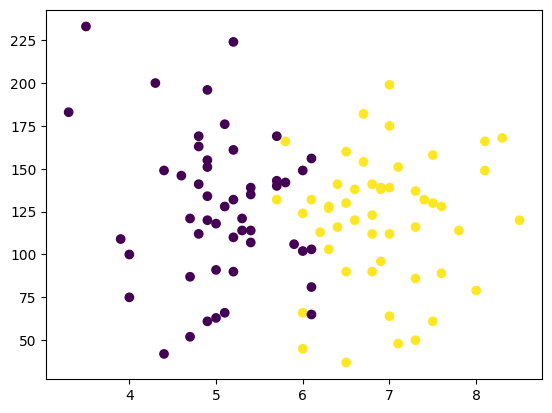

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [ ]:
y_test

,placement
91,1
5,1
29,1
10,1
97,1
47,0
86,0
49,0
63,1
46,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)

In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
X_train

array([[ 0.1097118 ,  0.20674233],
       [ 0.88246447,  0.38443356],
       [-1.43579355,  1.93288567],
       [ 0.02385039,  0.63827817],
       [-0.74890228,  1.32365861],
       [ 0.45315743,  0.91750723],
       [ 1.39763292,  0.10520449],
       [ 0.36729602,  0.43520248],
       [ 1.1400487 , -1.87478346],
       [ 0.1097118 , -1.49401654],
       [-1.00648651, -0.30094689],
       [ 1.2259101 ,  0.20674233],
       [-0.66304087,  2.54211273],
       [-0.14787242,  1.069814  ],
       [ 2.17038559, -0.0978712 ],
       [-0.23373383,  1.14596738],
       [ 0.88246447,  1.29827415],
       [ 0.1097118 ,  0.81596939],
       [-0.49131806, -0.42786919],
       [ 0.53901884, -0.0978712 ],
       [-0.83476369, -0.14864012],
       [-0.74890228, -1.46863208],
       [ 0.62488025,  0.76520047],
       [ 0.02385039, -1.46863208],
       [ 1.1400487 , -0.19940904],
       [-1.09234791, -0.07248674],
       [ 0.02385039,  0.00366664],
       [ 0.79660306,  0.38443356],
       [-2.29440763,

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf=LogisticRegression()

In [ ]:
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9

In [ ]:
#decision boundary
from mlxtend.plotting import plot_decision_regions

<Axes: >

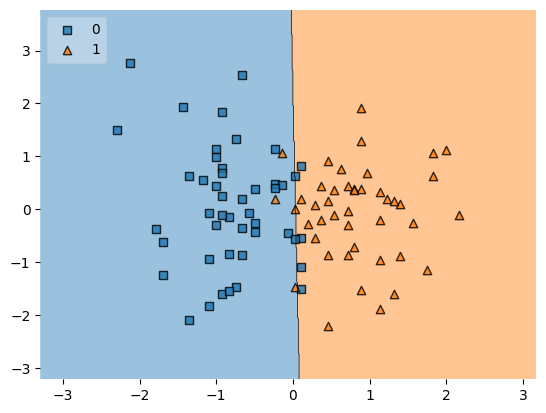

In [ ]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))